In [94]:
import plotly.express as px
import pandas as pd
import numpy as np
from collections import Counter
import ast
from plotly.colors import sample_colorscale
import plotly.graph_objects as go
import plotly.colors

In [114]:
MOVIES = pd.read_csv("cleaned_data.csv")
MOVIES.head()

,wikipedia_movie_ID,name,release_date,revenue,runtime,languages,countries,genres,release_year,vote_average,...,Female actor count,Male actor count,N/A actor count,Actors 0-20,Actors 20-30,Actors 30-40,Actors 40-60,Actors 60+,release_decade,plot_length
0,975900,ghosts of mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,5.127,...,6,11,0,0,2,3,7,5,2000.0,202
1,3196793,getting away with murder: the jonbenét ramsey ...,2000-02-16,0.0,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0,0.000,...,4,11,0,1,0,1,6,7,2000.0,34
2,13696889,the gangsters,1913-05-29,0.0,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913.0,6.000,...,0,1,0,0,0,0,0,1,1910.0,16
3,10408933,alexander's ragtime band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,6.600,...,2,2,0,0,2,2,0,0,1930.0,49
4,6631279,little city,1997-04-04,0.0,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",1997.0,3.833,...,4,2,0,0,1,4,1,0,1990.0,121


In [111]:
MOVIES.columns

Index(['wikipedia_movie_ID', 'name', 'release_date', 'revenue', 'runtime',
       'languages', 'countries', 'genres', 'release_year', 'vote_average',
       'vote_count', 'adult', 'budget', 'popularity', 'plot',
       'original_genres', 'new_genres', 'genre_hot', 'death', 'love',
       'tragedy', 'sentiment', 'Character Count', 'Female actor count',
       'Male actor count', 'N/A actor count', 'Actors 0-20', 'Actors 20-30',
       'Actors 30-40', 'Actors 40-60', 'Actors 60+', 'release_decade',
       'plot_length'],
      dtype='object')

In [97]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [98]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [99]:
unique_genre = list()
MOVIES["new_genres"].apply(lambda x: unique_genre.extend(ast.literal_eval(x)))
unique_genre = Counter(unique_genre)
unique_genre = {k: v for k, v in sorted(unique_genre.items(), key=lambda item: item[1], reverse=True)}
unique_genre["Other"] = 0
for idx, entry in enumerate(unique_genre):
    if idx>15 and entry != 'Other':
        unique_genre['Other'] += unique_genre[entry]
        unique_genre[entry] = 0
unique_genre = {x:y for x,y in unique_genre.items() if y!=0}
unique_genre = pd.DataFrame.from_dict(unique_genre, orient='index')
unique_genre = unique_genre.rename(columns={'index':'genre', 0:'count'})
unique_genre = unique_genre

In [100]:
# create the wordcloud
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package wordnet to /Users/sayaka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sayaka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text.lower())
    text = ' '.join([WordNetLemmatizer().lemmatize(word) for word in text.split() if word not in stopwords.words('english')])
    # manually add some stopwords
    text = ' '.join([word for word in text.split() if word not in ['tell', 'find', 'one', 'will', 'take', 'become']])
    return text

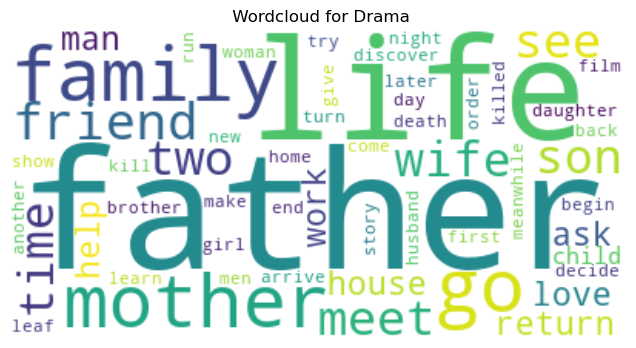

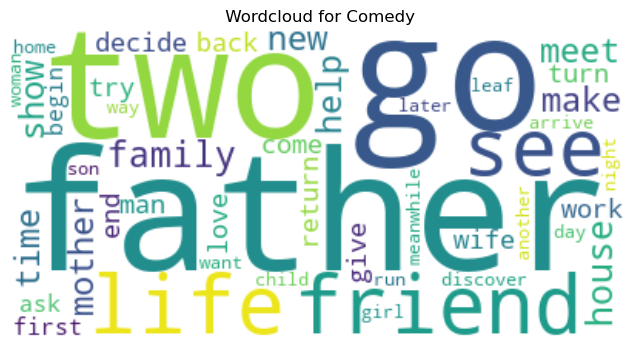

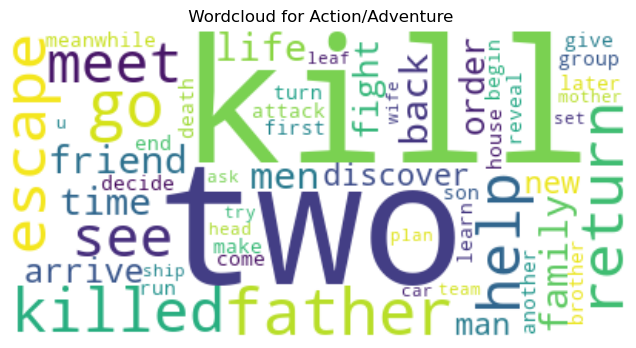

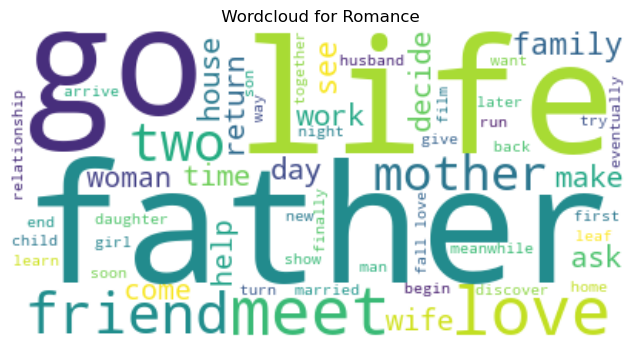

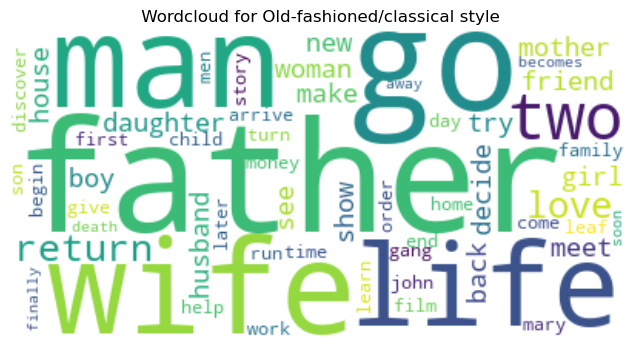

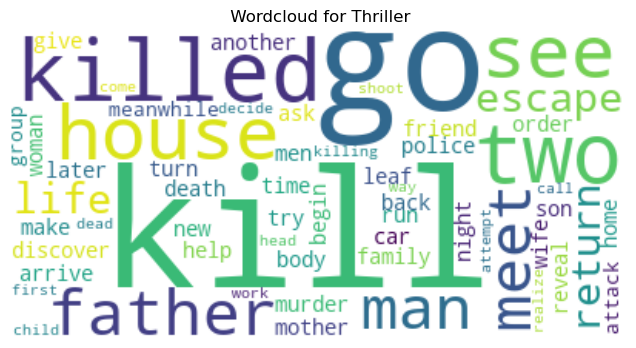

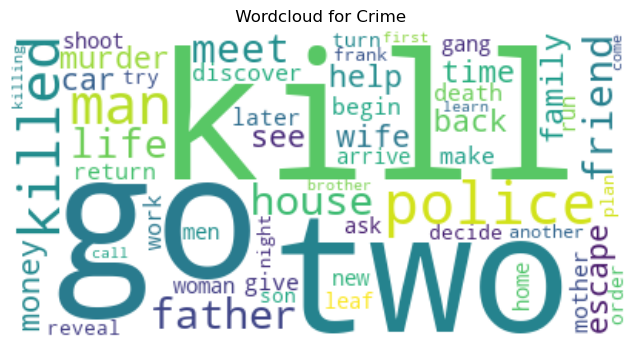

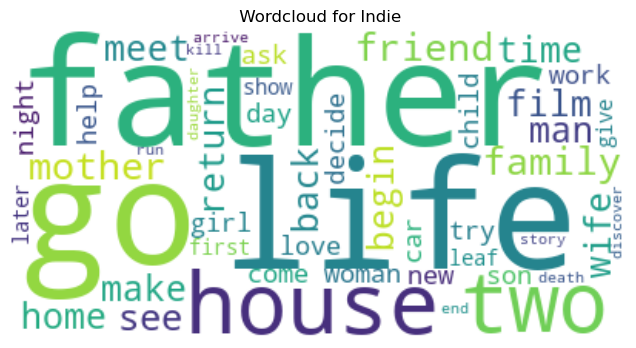

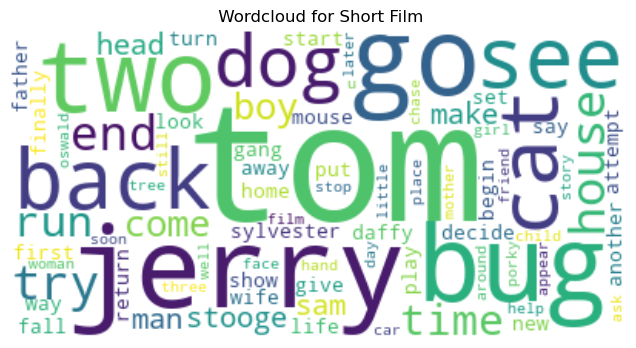

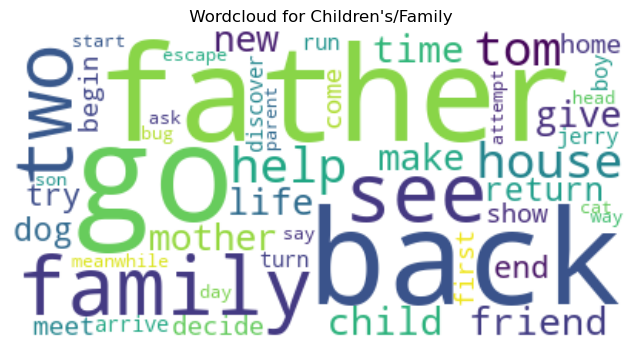

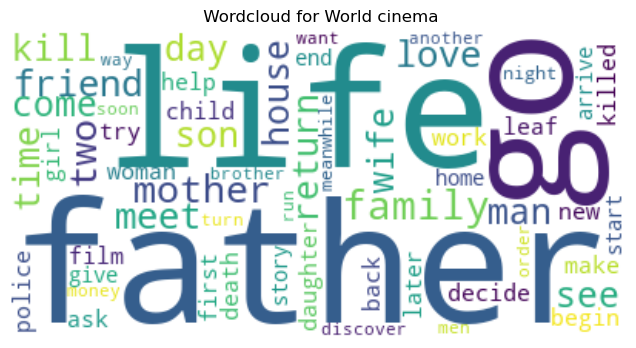

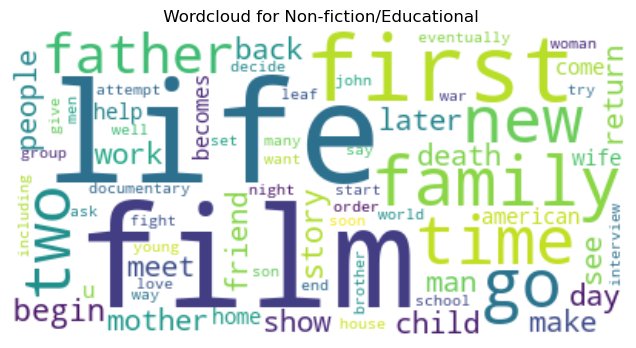

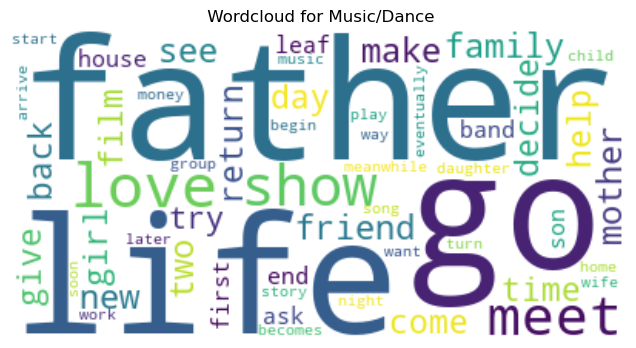

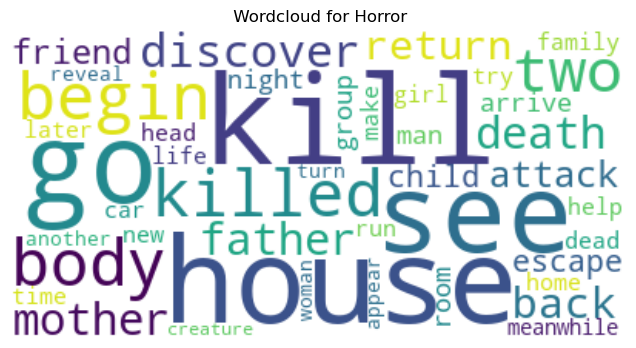

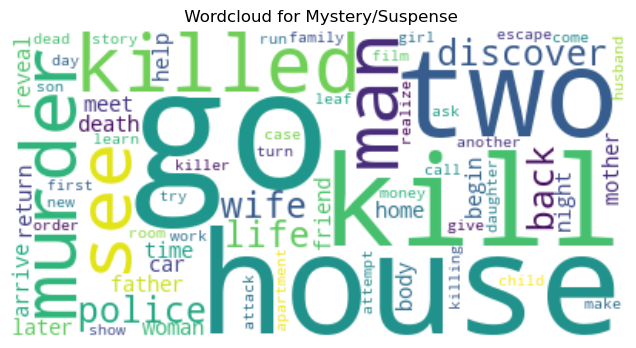

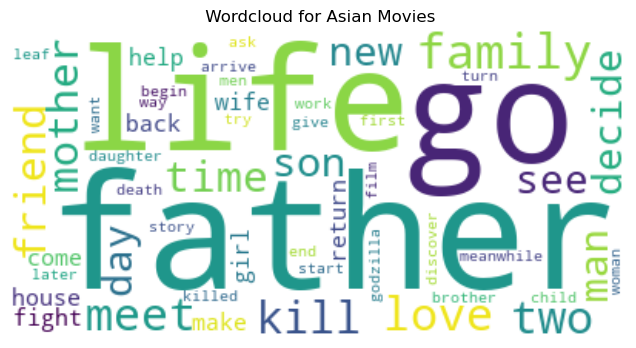

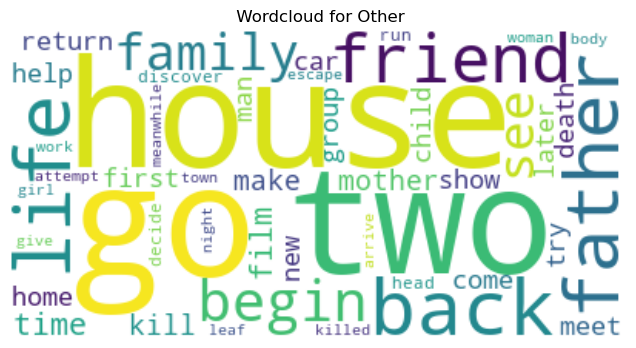

In [60]:
# create the wordcloud for each uniqeus genre
for genre in unique_genre.index:
    data = preprocess_text(MOVIES[MOVIES["new_genres"].apply(lambda x: genre in ast.literal_eval(x))]["plot"].str.cat(sep=' '))
    wordcloud = WordCloud(background_color ='white',
                    stopwords = None,
                    min_font_size = 10).generate(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f" Wordcloud for {genre}") 
    plt.show()
    # save png file with titles on png
    genre_name = genre.replace("/", "_")
    wordcloud.to_file(f"{genre_name}.png")

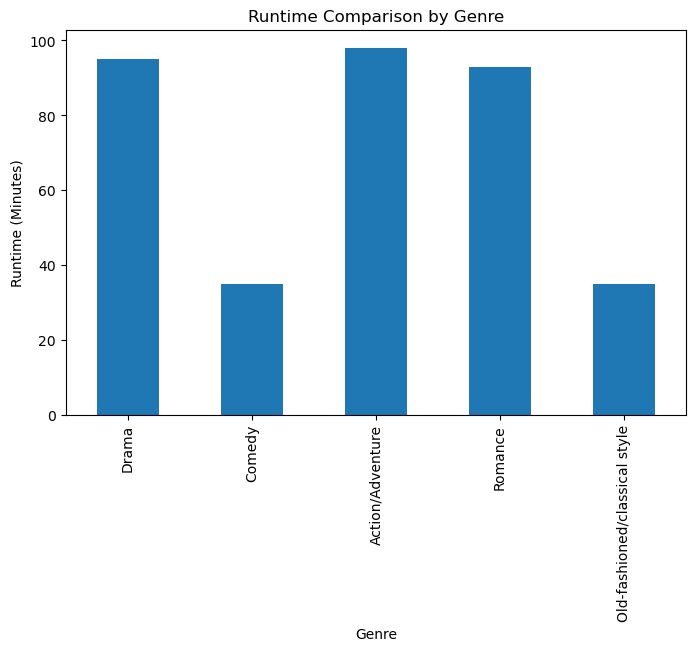

None


In [91]:

# Function to preprocess genres and select top genres
def get_top_genres(movies_df, column_name="new_genres", top_n=5):
    unique_genre = []
    movies_df[column_name].apply(lambda x: unique_genre.extend(ast.literal_eval(x)))
    genre_counts = Counter(unique_genre)
    sorted_genres = genre_counts.most_common(top_n)
    return [genre[0] for genre in sorted_genres]

# Function to explore single movies by genre
def explore_movies_by_genre(movies_df, genres_column="new_genres", features=None):
    top_genres = get_top_genres(movies_df, column_name=genres_column, top_n=5)

    # Select one movie from each genre
    selected_movies = []
    for genre in top_genres:
        movie = movies_df[movies_df[genres_column].apply(lambda x: genre in ast.literal_eval(x))].iloc[0]
        selected_movies.append({"genre": genre, "movie": movie})

    # Extract specified features
    if features is None:
        features = ["name", "runtime", "release_year", "sentiment"]

    feature_data = pd.DataFrame({
        "Genre": [item["genre"] for item in selected_movies],
        **{feature: [item["movie"][feature] for item in selected_movies] for feature in features}
    })

    # Plot runtime comparison
    feature_data.plot(
        x="Genre", y="runtime", kind="bar", figsize=(8, 5), title="Runtime Comparison by Genre", legend=False
    )
    plt.xlabel("Genre")
    plt.ylabel("Runtime (Minutes)")
    plt.show()

features_to_explore = ["name", "runtime", "release_year", "sentiment"]
explored_features = explore_movies_by_genre(MOVIES, features=features_to_explore)
print(explored_features)


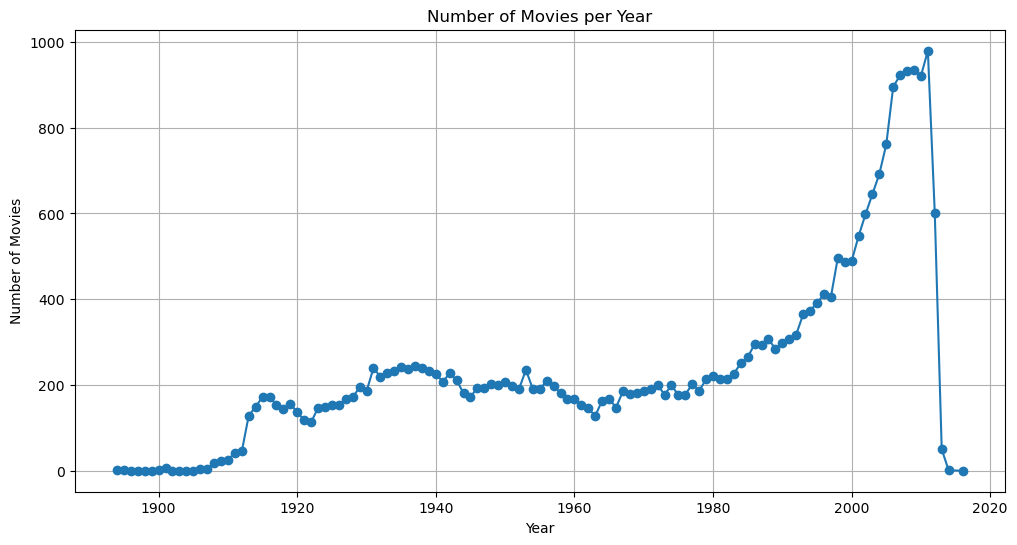

In [86]:
# number movies / year
movies_per_year = MOVIES.groupby("release_year").size()
movies_per_year = movies_per_year.reset_index()
movies_per_year.columns = ["release_year", "count"]

# plot the number of movies per year
plt.figure(figsize=(12, 6))

plt.plot(movies_per_year["release_year"], movies_per_year["count"], marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Year")
plt.grid(True)


In [120]:
# Function to preprocess genres and select top genres
def get_top_genres(movies_df, column_name="new_genres", top_n=5):
    unique_genre = []
    movies_df[column_name].apply(lambda x: unique_genre.extend(ast.literal_eval(x)))
    genre_counts = Counter(unique_genre)
    sorted_genres = genre_counts.most_common(top_n)
    return [genre[0] for genre in sorted_genres]

def get_top_words_by_genre(movies_df, genres_column="new_genres", plot_column="plot", top_n=5):
    top_genres = get_top_genres(movies_df, column_name=genres_column, top_n=5)
    genre_top_words = {}

    for genre in top_genres:
        genre_movies = movies_df[movies_df[genres_column].apply(lambda x: genre in ast.literal_eval(x))]
        tokens = preprocess_text(genre_movies[plot_column].str.cat(sep=' ')).split()
        word_counts = Counter(tokens)
        top_words = word_counts.most_common(top_n)
        genre_top_words[genre] = top_words

    return genre_top_words

# Extract top words by genre
top_words = get_top_words_by_genre(MOVIES, genres_column="new_genres", plot_column="plot")
for genre, words in top_words.items():
    print(f"Top words for {genre}: {words}")


Top words for Drama: [('life', 8196), ('go', 7973), ('get', 7561), ('father', 7226), ('love', 6840)]
Top words for Comedy: [('get', 7429), ('go', 6090), ('back', 5185), ('two', 4658), ('friend', 4565)]
Top words for Action/Adventure: [('get', 4422), ('back', 4320), ('go', 4117), ('kill', 4000), ('two', 3880)]
Top words for Romance: [('love', 5313), ('get', 3822), ('go', 3801), ('life', 3436), ('friend', 3187)]
Top words for Old-fashioned/classical style: [('love', 1526), ('get', 1507), ('man', 1496), ('go', 1394), ('film', 1207)]


In [121]:
# Function to visualize feature changes across genres
def visualize_features_by_genre(movies_df, features, genres_column="new_genres"):
    top_genres = get_top_genres(movies_df, column_name=genres_column, top_n=5)
    genre_data = []

    for genre in top_genres:
        genre_movies = movies_df[movies_df[genres_column].apply(lambda x: genre in ast.literal_eval(x))]
        genre_summary = {
            "Genre": genre,
            **{feature: genre_movies[feature].mean() for feature in features}
        }
        genre_data.append(genre_summary)

    genre_df = pd.DataFrame(genre_data)

    # Plot runtime and sentiment comparison
    genre_df.plot(x="Genre", y=features, kind="bar", figsize=(12, 6), title="Feature Comparison by Genre")
    plt.xlabel("Genre")
    plt.ylabel("Values")
    plt.legend(title="Features")
    plt.show()

    return genre_df

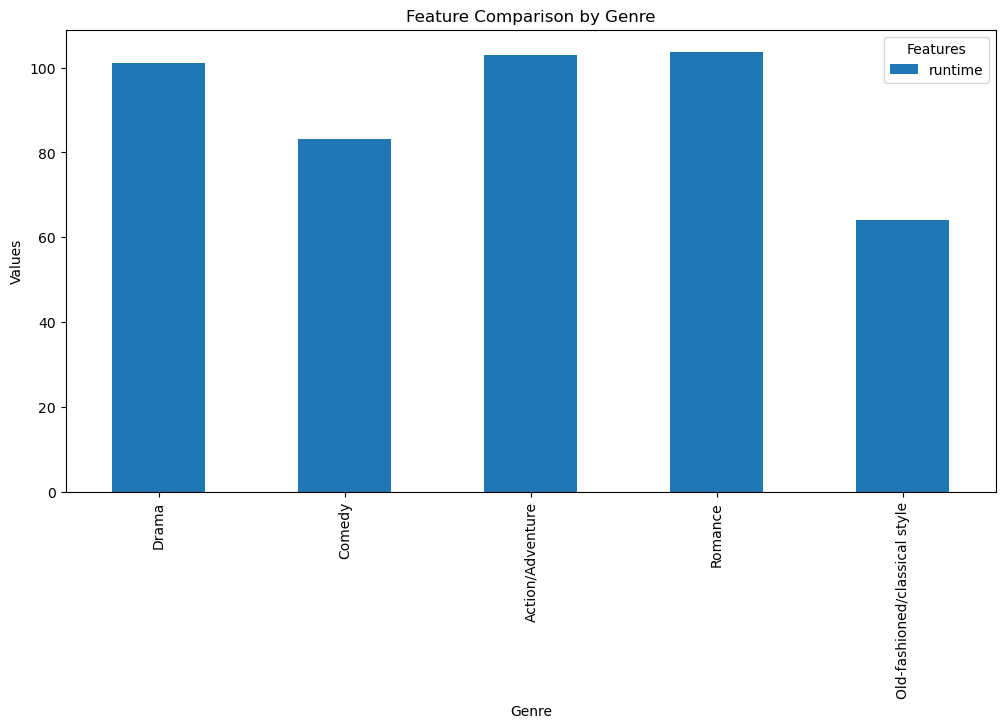

                           Genre     runtime
0                          Drama  101.037340
1                         Comedy   83.090153
2               Action/Adventure  102.958917
3                        Romance  103.800498
4  Old-fashioned/classical style   64.037804


In [117]:
features_to_visualize = ["runtime"]
visualized_data = visualize_features_by_genre(MOVIES, features=features_to_visualize)
print(visualized_data)

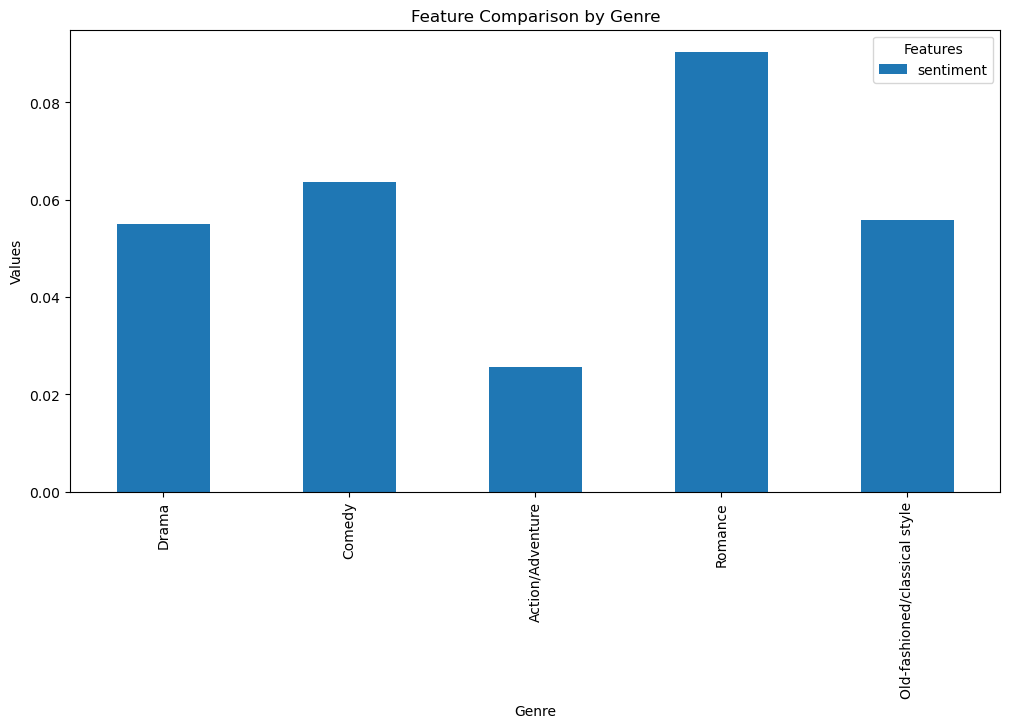

                           Genre  sentiment
0                          Drama   0.054943
1                         Comedy   0.063658
2               Action/Adventure   0.025526
3                        Romance   0.090447
4  Old-fashioned/classical style   0.055781


In [118]:
features_to_visualize = ["sentiment"]
visualized_data = visualize_features_by_genre(MOVIES, features=features_to_visualize)
print(visualized_data)


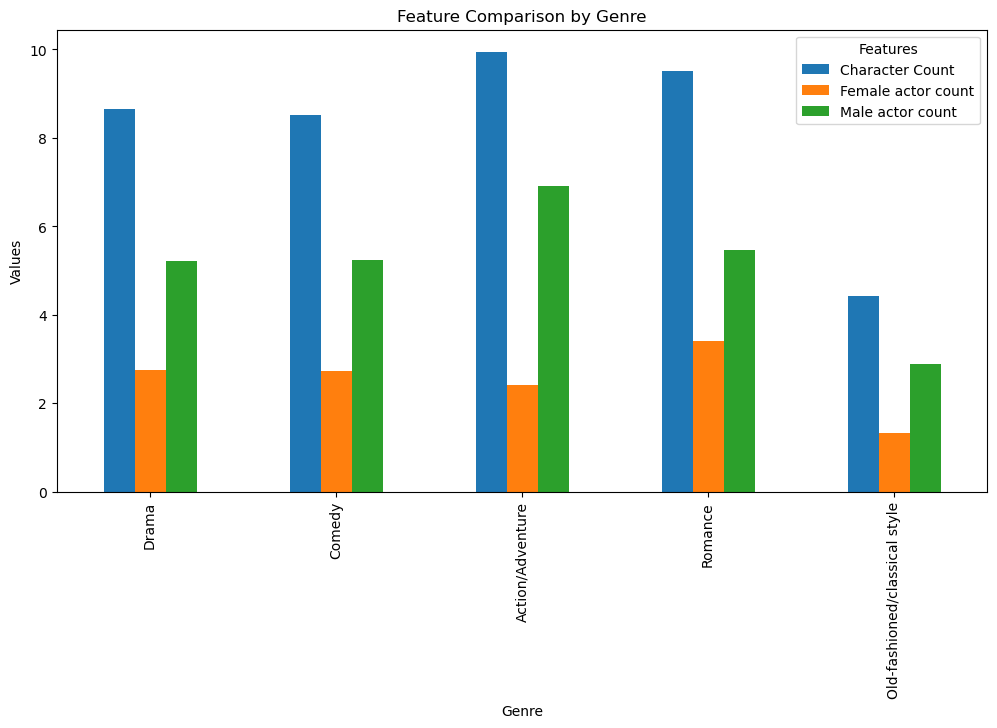

                           Genre  Character Count  Female actor count  \
0                          Drama         8.646591            2.760214   
1                         Comedy         8.516342            2.732349   
2               Action/Adventure         9.952182            2.408962   
3                        Romance         9.518086            3.414737   
4  Old-fashioned/classical style         4.420925            1.322763   

   Male actor count  
0          5.209707  
1          5.247643  
2          6.917405  
3          5.468325  
4          2.891133  


In [119]:
# Example usage (replace MOVIES with your actual DataFrame)
features_to_visualize = [ "Character Count", "Female actor count", "Male actor count"]
visualized_data = visualize_features_by_genre(MOVIES, features=features_to_visualize)
print(visualized_data)
